# Final Project Submission

Please fill out: 
* Student name: Denis Kibor Kipkemoi.
* Student pace: full time.
* Scheduled project review date/time: 3/28/2025.
* Instructor name: Nikita Njoroge.
* Blog post URL: 

<h1>Airline Decision - Data Science Project.</h1>
<p>My company wants to diversisfy it's portfolio by venturing into the airlines industry, particularly they are interested in purchasing and operating airplanes for both commercial and private enterprises. I have been tasked with the reponsibity to asses the risk associated with the aircrafts and turn my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase. <br> In this project I am going to do my analysis using data from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters for my analysis.

</p>

<h2>Business Questions</h2>

<h5>1. What's the general trend of aircraft accidents over the years?</h5>

<h5>2. Are there specific aircraft Makes that have high accident counts associated with them?</h5>

<h5>3. Which aircraft makes have the highest number of survivable accidents?</h5>

<h2>Assumptions</h2>

<p><b>1. Aircraft Popularity vs. Accident Frequency</b>

Aircraft with higher accident counts may be more widely used, rather than inherently riskier.</p>

<p><b>2. Severity of Accidents</b>

A high number of accidents does not necessarily mean high risk—some accidents may be minor with no fatalities.</p>

<p><b>3. Low Accident count vs Safety</b> 

Aircrafts that have a low accident(which is the majority in our data), aren't necessarily safe. Instead we have assumed that they are either not popular or not widely used.</p>


<h3>Step 1: Importing Necessary Python Libraries</h3>

In [2]:
# First I am going to import all the necessary python libraries that I will need for my analysis.

import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

<h3>Step 2: Load and Preview Data</h3>
<p>In this step we will load the AviationData.csv data which will be our primary dataset for analysis. 
We will also hover over our data and get familiar with what it contains.</p>

In [3]:
# First using pandas we import our data and convert it from csv into a pandas datframe so that we can manipulate the data.
df = pd.read_csv('AviationData.csv', encoding="Windows-1252")
df.tail()

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [4]:
# Checking the shape of our data. 
df.shape

(88889, 31)

In [5]:
# Checking the shape, data types and non-null values in column in our dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

<h4>Conclusions</h4>
<p>Our data is made up 88889 rows and 31 columns. The rows run from index 0 to 88888. The columns contain two types of data, namely: objects and float64. There are columns that contain non-null values which we will deal with in the next steps </p>

<h3>Step 3: Data Cleaning and Processing. </h3>
<p><b>3.1 Filtering:</b> We've noticed that there are columns in our dataset that we won't need for our analysis so we should filter our data to contain only the columns we're interested in before we start cleaning. To do this we'll create a new dataframe and call it clean_df. After this we'll use clean_df for the rest of the project. <br> <b>My Filter will be a follows: </b> <br>
Aircraft Identification → 'Make', 'Model', 'Aircraft.Category',.

Risk Assessment -  'Investigation.Type','Injury.Severity', 'Aircraft.damage', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.

Injuries', 'Total.Uninjured'.
Contextual Factors - 'Weather.Condition', 'Broad.phase.of.flight', 'Purpose.of.flight' .

Incident Details - 'Event.Date', 'Location', 'Country', 'Event.Id' .

Engine & Performance(to analyze risk per engine type) - 'Number.of.Engines', 'Engine.Type' </p>

In [6]:
# Making a copy od our original dataframe.
clean_df = df.copy() 

# A list of the columns that will be relevant for our analysis.
relevant_col = [ 'Event.Id', 
    'Event.Date',
    'Investigation.Type',
    'Location',
    'Country',
    'Injury.Severity',
    'Aircraft.damage',
    'Aircraft.Category',
    'Make',
    'Model',
    'Number.of.Engines',
    'Engine.Type',
    'Purpose.of.flight',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Weather.Condition',
    'Broad.phase.of.flight']

clean_df = clean_df[relevant_col]

In [7]:
clean_df.info() # check the general information of our new dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Investigation.Type      88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Injury.Severity         87889 non-null  object 
 6   Aircraft.damage         85695 non-null  object 
 7   Aircraft.Category       32287 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Engine.Type             81812 non-null  object 
 12  Purpose.of.flight       82697 non-null  object 
 13  Total.Fatal.Injuries    77488 non-null  float64
 14  Total.Serious.Injuries  76379 non-null

In [8]:
clean_df.describe() # Summary Statistics.

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


<p><b>3.2 Cleaning our Data:</b> Now that we've filtered our data to the necessary columns, we want to clean our data. We will deal with all the duplicates and the missing values before we can start generating insights from our data. 
</p>

In [9]:
# Checking for duplicated values in our dataset
clean_df.duplicated().sum()

28

####
We can see that there are 28 duplicates in our dataset, represented by the boolean True. We are going to drop all the duplicates as our solution
####

In [10]:
clean_df.drop_duplicates(inplace=True) # Dropping the duplicates 

clean_df.duplicated().sum() # asserting that our dataframe has no duplicates 

0

<h4><b>Dealing with Missing Values</b></h4>
<p>Now that we've gotten rid of the missing values we move on to missing values. In this step we will indentify the columns that have missing values and deal with them accordingly. We will also explain reasons why we chose to handle them how we will handle them.</p>

In [11]:
clean_df.isna().sum()  # Sum of missing values for each row

Event.Id                      0
Event.Date                    0
Investigation.Type            0
Location                     52
Country                     226
Injury.Severity             999
Aircraft.damage            3191
Aircraft.Category         56580
Make                         63
Model                        92
Number.of.Engines          6081
Engine.Type                7075
Purpose.of.flight          6190
Total.Fatal.Injuries      11398
Total.Serious.Injuries    12503
Total.Minor.Injuries      11926
Total.Uninjured            5908
Weather.Condition          4491
Broad.phase.of.flight     27162
dtype: int64

We will first handle columns with a huge chunk of missing data. In our case we have Aircraft.Category and Broad.phase.of.flight, since the missing values are too many we'd rather just drop them.

In [12]:
# We drop the columns with too many missing values i.e Aircraft.Category and Broad.phase.of.flight
clean_df.drop(columns = ['Aircraft.Category','Broad.phase.of.flight'], inplace=True)
clean_df.shape

(88861, 17)

Next we will deal with columns that have a very small number of missing values. In our dataset these are: Location, Country, injury.severity, Make, and Model columns. We shall drop the rows with missing values 

In [13]:
clean_df.dropna(subset=['Location', 'Country', 'Injury.Severity', 'Make', 'Model'], inplace=True)
clean_df.isna().sum()
clean_df.shape

(87495, 17)

Lastly we are going to deal with the remaining set of missing values by filling in. We have 2 cases: 
1. Categorical values like 'Aircraft.damage', 'Engine.Type', 'Purpose.of.flight', and 'Weather.Condition', it's best to replace missing values with 'missing' to avoid data loss.

2. For numeric columns ('Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.ingines'), missing values can be filled the median value.


In [14]:
# Case 1. Categorical Columns.
categorcal_col = ['Aircraft.damage', 'Engine.Type', 'Purpose.of.flight','Weather.Condition']
clean_df[categorcal_col] = clean_df[categorcal_col].fillna('missing')

# Case 2. Numerical columns.
injury_col = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Number.of.Engines']
for col in injury_col:
    clean_df[col] = clean_df[col].fillna(clean_df[col].median())

clean_df.isna().sum()

Event.Id                  0
Event.Date                0
Investigation.Type        0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
dtype: int64

Now our data no longer has missing values. Now let's check for extraneous values in out dataset.


In [15]:
for col in clean_df.columns:
    print(col, '\n', clean_df[col].value_counts().head(), '\n\n')

Event.Id 
 20001214X45071    3
20001212X19172    3
20001213X35266    2
20020917X02400    2
20001214X43122    2
Name: Event.Id, dtype: int64 


Event.Date 
 1984-06-30    25
1982-05-16    25
1986-05-17    24
2000-07-08    24
1984-08-25    24
Name: Event.Date, dtype: int64 


Investigation.Type 
 Accident    84345
Incident     3150
Name: Investigation.Type, dtype: int64 


Location 
 ANCHORAGE, AK      434
MIAMI, FL          200
ALBUQUERQUE, NM    196
HOUSTON, TX        192
CHICAGO, IL        184
Name: Location, dtype: int64 


Country 
 United States     82059
Brazil              348
Canada              332
Mexico              308
United Kingdom      261
Name: Country, dtype: int64 


Injury.Severity 
 Non-Fatal    67131
Fatal(1)      6127
Fatal         5248
Fatal(2)      3676
Incident      2179
Name: Injury.Severity, dtype: int64 


Aircraft.damage 
 Substantial    63774
Destroyed      18421
missing         2653
Minor           2555
Unknown           92
Name: Aircraft.damage, dtype: in

As we can see there are no significant extraneous values except for some columns where the 'UNK','Unk' and 'missing'(which is the value we used to fill missing values in categorical coulmns) seem to be the same thing. So we'll just replace them below with "Unknown" and then move on to the next step.

In the 'Make' column we shall convert all the object into strings to enhance uniformity.

In [16]:
# correcting the axtraneous Values in the relevant columns.

clean_df['Weather.Condition'] = clean_df['Weather.Condition'].replace(['UNK', 'Unk', 'missing'], 'Unknown')
clean_df['Purpose.of.flight'] = clean_df['Purpose.of.flight'].replace('missing', 'Unknown')
clean_df['Aircraft.damage'] = clean_df['Aircraft.damage'].replace('missing', 'Unknown')
clean_df['Engine.Type'] = clean_df['Engine.Type'].replace(['UNK', 'missing'], 'Unknown')

clean_df['Make'] = clean_df['Make'].str.title()


<h3>Data Engineering for Flight Purpose.</h3>
<p>Now that we're done with cleaning our data we want to create a meaningfull variables that suit our objectives. In our data under the 'Purpose.of.Flight' column we can notice that there are some flights whose purposes are either sports, military or other. These are not suitable for our decisions, because we are only interested in commercial and private airlines. We shall categorize our data into private_commercial and other.
 <br> N/B: I did my own research and categorized the data accordingly.<br> 
We will also filter out values that are not accidents in the 'Investigation.Type' column.</p>

In [17]:
# Checking for unique values in the "Purpose.of.Flight" column and their counts.

clean_df['Purpose.of.flight'].value_counts().head(40)


Personal                     49331
Unknown                      11830
Instructional                10575
Aerial Application            4708
Business                      3997
Positioning                   1627
Other Work Use                1254
Ferry                          804
Aerial Observation             784
Public Aircraft                716
Executive/corporate            549
Flight Test                    399
Skydiving                      182
External Load                  123
Public Aircraft - Federal      104
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

<p>Now that we have the full list of unique values in the column, we go ahead and classify them in the next cell, we'll create a new column for that specific purpose.</p>

In [18]:
private_commercial = ["Personal", "Instructional", "Business", "Executive/corporate", "Glider Tow", "Aerial Application", "Aerial Observation", "Skydiving", "External Load", "Banner Tow", "Ferry", "Flight Test", "Positioning","Unknown"]
other = ["Public Aircraft", "Public Aircraft - Federal", "Public Aircraft - Local", "Public Aircraft - State", "Firefighting", "Air Race/show", "Air Race Show", "Air Drop", "ASHO", "PUBS", "PUBL"]


my_filter = ['Suitable' if x in private_commercial else 'Not.Suitable' for x in clean_df['Purpose.of.flight']]
# This is a filter that will check the 'Purpose.of.Flight' column and classify them as either Suitable or Not.Suitable.

clean_df["Flight.category"] = my_filter 
# This will create a new column "Flight.category" that satisfies our filter

clean_df.shape

(87495, 18)

In [19]:
clean_df = clean_df[(clean_df['Flight.category'] == 'Suitable') & (clean_df['Investigation.Type'] == 'Accident')]  # Extract the data that is suitable for our analysis.
clean_df.shape # Assert that the rows that aren't desired are dropped.


(81969, 18)

In [20]:
# We can save our clean data for futher use. 
 
clean_df.to_csv('clean.aviasionData.csv', index=False)

<h3>Step 4. Exploratory Data anlysis<h3>

<h5><b>Question 1. Understanding the Trend of Aviation Accidents Over the Years</b></h5>
<p>In this step, we are analyzing the frequency of aviation accidents by year. Our goal is to understand how accident occurrences have changed over time, which can help identify trends of these accidents.</p>

<p><b>Steps:</b> <br>

1. Since the Event.Date column contains full dates (e.g., "2005-07-15"), we extract only the first four characters (representing the year) to create a new column, Year.<br>

2. We count how many times each year appears in the dataset to determine the accident frequency for each year.

3. The result is then converted into a DataFrame for easier manipulation and visualization. But since the value_counts() function returns a Series, we reset the index and rename the columns for clarity.

</p>

In [21]:
# Extract the year from 'Event.Date' by taking the first 4 characters
clean_df['Year'] = clean_df['Event.Date'].astype(str).str[:4]

question1_df = clean_df['Year']   # Select only the 'Year' column for analysis

question1_df = question1_df.value_counts().T  # Count occurrences of each year
question1_df = pd.DataFrame(question1_df)   # Convert the result into a DataFrame
question1_df.reset_index(inplace=True)  

# Rename columns for better clarity
question1_df.rename(columns={'index':'Year', 'Year': 'Accident_Counts'},inplace=True)
question1_df.rename_axis(None,axis=1)

question1_df.head()

,Year,Accident_Counts
0,1982,3437
1,1983,3335
2,1984,3261
3,1985,2944
4,1986,2742


<h5>Visualizing the Trend of Airplane Accidents Over Time</h5> 
<p>In this step, we are creating a line chart to visualize how the number of airplane accidents has changed over the years. This will help stakeholders identify patterns, such as whether accidents are decreasing due to improved safety regulations or whether certain periods experienced a spike in incidents.<br>

Note: To focus on more recent trends, we keep only data from 1983 onwards.</p>

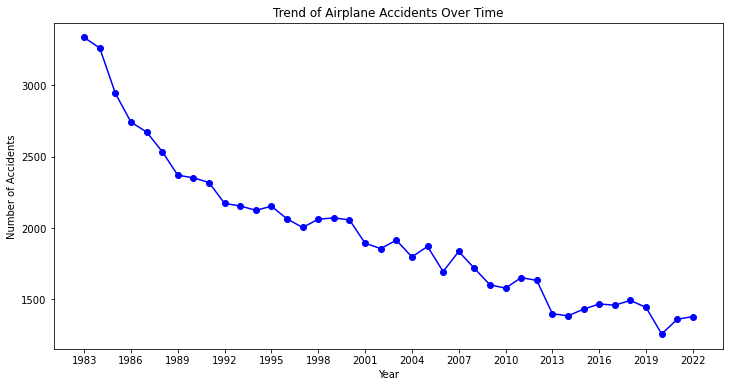

In [22]:
# Sort the DataFrame by Year in ascending order
question1_df = question1_df.sort_values(by='Year', ascending=True)

# Convert the Year column to an integer for numerical analysis
question1_df['Year'] = question1_df['Year'].astype(int)

# Filter the data to include only accidents after 1982
question1_df = question1_df[(question1_df['Year'] > 1982)]


# Set figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot
ax.plot(question1_df['Year'], question1_df['Accident_Counts'], marker='o', color='blue')

plt.xticks(range(question1_df['Year'].min(), question1_df['Year'].max() + 1, 3))
# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accidents')
ax.set_title('Trend of Airplane Accidents Over Time')

# Show plot
plt.show()

<h4>Conclusion</h4><p>The visualization highlights a clear trend in the number of airplane accidents over time, showing how probable advancements in technology and the introduction of newer aircraft have significantly influenced safety. Given this insight, the company should prioritize purchasing newer aircraft models from manufacturers with a strong safety record.</p>

<h5><b>Question2. Are there specific aircraft Makes that have high accident counts associated with them?</b></h5>

<p>Based on our observations in the previous analysis, we noticed that aircraft accidents have generally declined over time. Given this, we will now focus on data from the year 2000 onwards to ensure our insights are relevant to modern aviation operations. Analyzing older data might introduce outdated risks that no longer apply due to advancements in aircraft manufacturing technology<br>
<b>Steps:</b> <br>

1. We extract only records from the year 2000 onwards to ensure our analysis reflects current aviation risks.

2. Determine how frequently each aircraft manufacturer appears in accident reports(count accidents per Make).

3. The accident counts are transformed into a structured DataFrame for further processing.

4. Reset Index - this step ensures that aircraft manufacturers are treated as a column instead of an index, making data manipulation easier.
</p>

Note: Since our data has too much information, we will pick a sample of the top 15 aircrafts with the highest frequency of accidents for our analysis.

In [23]:
# Filter dataset to include only accidents that occurred after the year 2000
question2_df = clean_df[clean_df['Year'].astype(int) > 2000]

# Count the number of accidents per aircraft make
question2_df = question2_df['Make'].value_counts().T

# Convert the series into a DataFrame
question2_df = pd.DataFrame(question2_df)

question2_df.reset_index(inplace=True)  # Reset index to make 'Make' a column instead of an index
question2_df.rename(columns={'index':'Make', 'Make': 'Accident Counts'},inplace=True) # rename columns
question2_df.rename_axis(None,axis=1)

# Select only the top 15 manufacturers with the highest accident counts
question2_df = question2_df.head(15)

question2_df.head()

,Make,Accident Counts
0,Cessna,9515
1,Piper,5386
2,Beech,2001
3,Bell,914
4,Robinson,698



<p>We now visualize the accident counts for the top 15 aircraft manufacturers from the year 2000 onwards using a horizontal bar chart. This helps us quickly identify which manufacturers have had the most accidents in modern aviation history.</p>

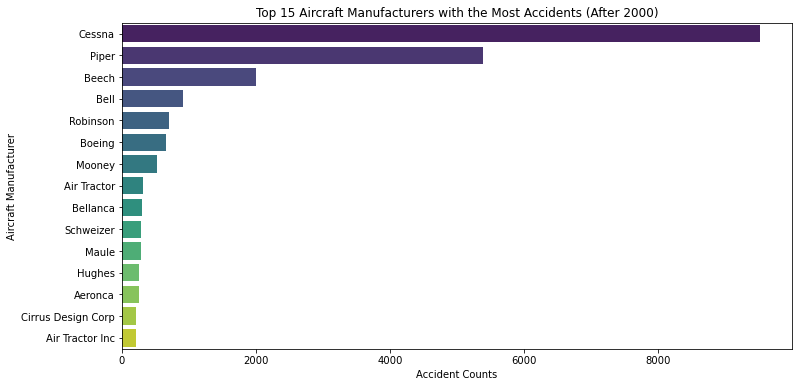

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=question2_df, y='Make', x='Accident Counts', palette='viridis')

plt.xlabel("Accident Counts")
plt.ylabel("Aircraft Manufacturer")
plt.title("Top 15 Aircraft Manufacturers with the Most Accidents (After 2000)")

plt.show()


<h3>Conclusion</h3>
From this analysis, we observe that certain manufacturers have significantly higher accident counts than others. However, this does not necessarily mean their aircraft are less safe, it could also indicate their higher market presence and production volume. Manufacturers like Cessna and Piper appear frequently, likely due to their dominance aircraft industry. This insight helps us understand accident trends among different makes, guiding decisions on which aircraft require further safety evaluations before purchase.

<h4><b>Question 3. Which aircraft makes have the highest number of survivable accidents after the year 2000?</b></h4>
<p>In this analysis, we aim to assess the survival rates for aircraft models with the most accidents after the year 2000. Using the Injury.Severity column, we focus on cases where passengers survived, i.e., those categorized as "Minor," "Serious," or "Non-Fatal." We group the data by aircraft make and count the total number of survivable cases to gain insights into aircraft safety.<br>

Since our previous findings indicated that newer aircraft are likely to be safer due to advancements in manufacturing technology, we continue filtering for accidents occurring after 2000. This helps us evaluate modern aircraft models rather than older, potentially outdated ones.</p>

In [30]:
# Filter the dataset to include only accidents that occurred after the year 2000
relevant_df = clean_df[clean_df["Year"].astype(int) > 2000]

# Group by 'Make' and 'Injury.Severity' to count the number of occurrences of each severity level
severity_counts = (relevant_df.groupby(["Make", "Injury.Severity"]).size().reset_index(name="Non-Fatal Count"))

# Extract the top 15 aircraft manufacturers based on accident counts from the previous question
top_aircraft_makes = list(question2_df['Make'])
top_severity_df = severity_counts[severity_counts["Make"].isin(top_aircraft_makes)]

# Define severity categories considered as survivable incidents
survived = ["Minor", "Serious", "Non-Fatal"]

# Filter for only the rows where the injury severity falls under the "survived" category
survival_index = top_severity_df['Injury.Severity'].isin(survived)
top_severity_df = top_severity_df.loc[survival_index]

# Aggregate the total number of survivable incidents per aircraft make
question3_df = pd.DataFrame(top_severity_df.groupby('Make')['Non-Fatal Count'].sum())

# Reset index so that 'Make' becomes a column instead of an index
question3_df.reset_index(inplace=True)
question3_df.rename(columns={'index': 'Non-Fatal Count'}, inplace=True) # Rename columns
question3_df.rename_axis(None, axis=1)

# Merge the dataset with accident counts to get total accident data for aircraft with same Make
qn3_df = question3_df.merge(question2_df, on='Make')

# Calculate the survival rate as the percentage of survivable accidents out of total accidents
qn3_df["Survival Rate"] = (qn3_df["Non-Fatal Count"] / qn3_df["Accident Counts"] * 100)

qn3_df

,Make,Non-Fatal Count,Accident Counts,Survival Rate
0,Aeronca,222,249,89.156627
1,Air Tractor,250,316,79.113924
2,Air Tractor Inc,171,211,81.042654
3,Beech,1346,2001,67.266367
4,Bell,658,914,71.991247
5,Bellanca,257,303,84.818482
6,Boeing,565,656,86.128049
7,Cessna,7709,9515,81.019443
8,Cirrus Design Corp,140,212,66.037736
9,Hughes,203,250,81.200000


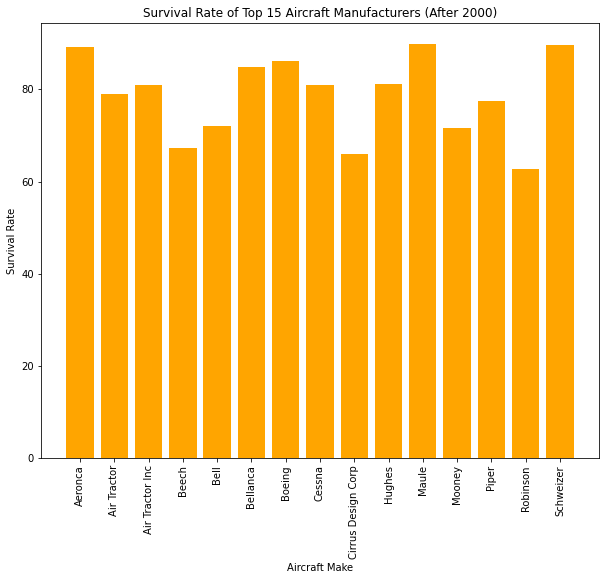

In [32]:
fig, ax = plt.subplots(figsize=(10,8))

x = qn3_df['Make']
height = qn3_df['Survival Rate']
ax.bar(x, height, color='orange')

plt.xlabel("Aircraft Make")
plt.ylabel("Survival Rate")
plt.title("Survival Rate of Top 15 Aircraft Manufacturers (After 2000)")

plt.xticks(rotation=90)

plt.show();

<h3>Conclusion.</h3>
The survival rate provides a crucial metric for assessing aircraft safety, showing the proportion of accidents where passengers had a chance of survival. From the analysis, we observe that certain aircraft manufacturers exhibit higher survival rates. 

A reasonable benchmark for a "safe" aircraft could be a survival rate of at least 80%, meaning that in at least 80% of recorded accidents, occupants sustained survivable injuries. Aircraft models that fall below this threshold may warrant further investigation before purchase.

<h2>Summary of Findings and Recommendations</h2>

Our analysis of aircraft accidents since the year 2000 focused on identifying the safest aircraft manufacturers based on accident counts and survival rates. We observed that while some aircraft models had higher accident frequencies, their survival rates varied significantly.

Additionally, the trend of airplane accidents over time suggests a decline in incidents, likely due to advancements in aviation technology, stricter safety regulations, and improved pilot training. This reinforces the importance of investing in newer aircraft models equipped with modern safety features.

Key Recommendations:

1. Prioritize Aircraft with a Survival Rate Above 80% – Models that exceed this threshold demonstrate better crash survivability and passenger safety.

2. Invest in Newer Aircraft Models – The decreasing trend in accidents over time suggests that modern planes are safer and acquiring them will reduce the likelihood of accidents and enhance overall safety.

3. Conduct Further Safety Evaluations Before Purchase – Beyond historical data, factors such as maintenance records, technological advancements, and compliance with modern aviation safety standards should be assessed to ensure long-term operational safety and reliability.
